<a href="https://colab.research.google.com/github/umerrafiq04/CNN/blob/main/Mask_Vs_WithoutMask/Scratch-Trained/FaceMask_Detection_CNN_EndToEnd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
import kagglehub


path = kagglehub.dataset_download("omkargurav/face-mask-dataset")
print("Dataset path:", path)

Using Colab cache for faster access to the 'face-mask-dataset' dataset.
Dataset path: /kaggle/input/face-mask-dataset


In [7]:

import os

KAGGLE_PATH ="/kaggle/input/face-mask-dataset/data"
print(os.listdir(KAGGLE_PATH))

['without_mask', 'with_mask']


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt


In [9]:
data_path=KAGGLE_PATH

In [11]:
train_gen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.1,
    validation_split=0.2
)

train_data = train_gen.flow_from_directory(
    data_path,
    target_size=(128,128),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

val_data = train_gen.flow_from_directory(
    data_path,
    target_size=(128,128),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)


Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [25]:
train_data.shuffle


True

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

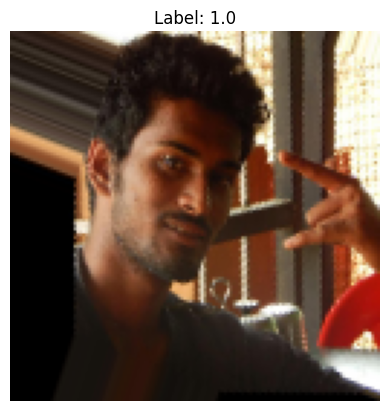

In [23]:
images, labels = val_data[0]      # get first batch... folder divided into batches.. batches contain images
plt.imshow(images[0])             # show first image of the batch(1)...
plt.title("Label: " + str(labels[0]))
plt.axis("off")

# val_data[0] returns a tuple:
# (images_batch, labels_batch)


In [24]:
len(val_data) #batches=48..images=48*32..

48

In [26]:
model = Sequential()

# Block 1
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

# Block 2
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

# Block 3
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

# Block 4
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

# Flatten
model.add(Flatten())

# Dense layers
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,619,457 (17.62 MB)

 Trainable params: 4,617,729 (17.62 MB)

 Non-trainable params: 1,728 (6.75 KB)

In [27]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [28]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),

    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.3,
        patience=2,
        min_lr=1e-6
    ),

    ModelCheckpoint(
        "best_model.keras",
        monitor='val_accuracy',
        save_best_only=True
    )
]


In [29]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=callbacks
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
112/189 ━━━━━━━━━━━━━━━━━━━━ 22s 292ms/step - accuracy: 0.7348 - loss: 0.6180

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 84s 387ms/step - accuracy: 0.7544 - loss: 0.5703 - val_accuracy: 0.5066 - val_loss: 2.1034 - learning_rate: 5.0000e-04
Epoch 2/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 43s 230ms/step - accuracy: 0.8568 - loss: 0.3417 - val_accuracy: 0.6642 - val_loss: 0.8224 - learning_rate: 5.0000e-04
Epoch 3/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 43s 226ms/step - accuracy: 0.8934 - loss: 0.2670 - val_accuracy: 0.8993 - val_loss: 0.2566 - learning_rate: 5.0000e-04
Epoch 4/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 43s 229ms/step - accuracy: 0.9092 - loss: 0.2204 - val_accuracy: 0.9318 - val_loss: 0.1931 - learning_rate: 5.0000e-04
Epoch 5/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 44s 231ms/step - accuracy: 0.9256 - loss: 0.1857 - val_accuracy: 0.8854 - val_loss: 0.2743 - learning_rate: 5.0000e-04
Epoch 6/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 42s 223ms/step - accuracy: 0.9414 - loss: 0.1464 - val_accuracy: 0.8907 - val_loss: 0.2527 - learning_rate: 5.0000e-04
Epoch 7/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 43s 230ms/step - 

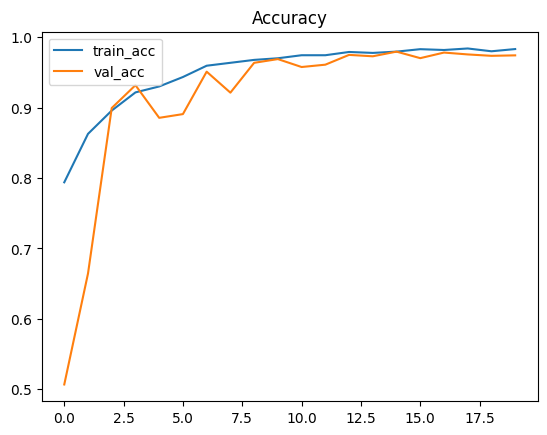

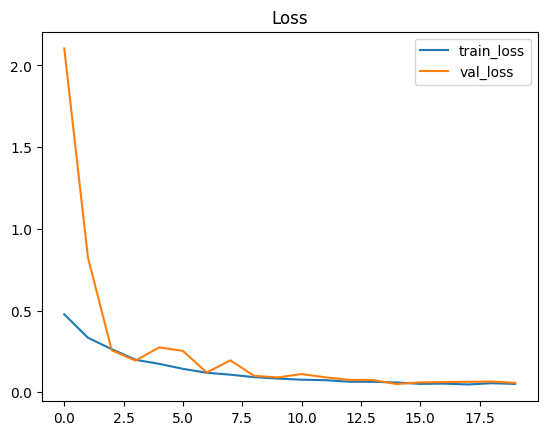

In [30]:
plt.plot(history.history['accuracy'], label="train_acc")
plt.plot(history.history['val_accuracy'], label="val_acc")
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.title("Loss")
plt.show()


In [31]:
loss, acc = model.evaluate(val_data)
print("Validation Accuracy:", acc)
print("Validation Loss:", loss)


48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.9682 - loss: 0.0660
Validation Accuracy: 0.9748344421386719
Validation Loss: 0.05814814940094948


Saving c.jpg to c (1).jpg
Saving close-up-portrait-handsome-smiling-young-man-white-t-shirt-blurry-outdoor-nature_176420-6305.avif to close-up-portrait-handsome-smiling-young-man-white-t-shirt-blurry-outdoor-nature_176420-6305.avif
Saving emotions-people-concept-headshot-serious-looking-handsome-man-with-beard-looking-confident-determined_1258-26730.avif to emotions-people-concept-headshot-serious-looking-handsome-man-with-beard-looking-confident-determined_1258-26730.avif
Saving imag.jpg to imag.jpg
Saving images.jpg to images (1).jpg
Saving indian-man-wearing-mask-stock-260nw-2062574735.webp to indian-man-wearing-mask-stock-260nw-2062574735.webp
Saving nomask.jpg to nomask (1).jpg
Uploaded: c (1).jpg


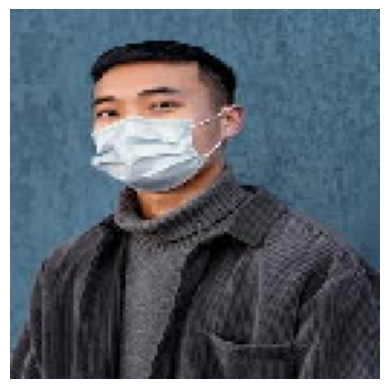

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: With Mask 🙂
Uploaded: close-up-portrait-handsome-smiling-young-man-white-t-shirt-blurry-outdoor-nature_176420-6305.avif


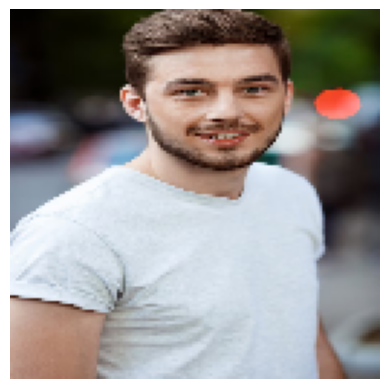

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: Without Mask 😷
Uploaded: emotions-people-concept-headshot-serious-looking-handsome-man-with-beard-looking-confident-determined_1258-26730.avif


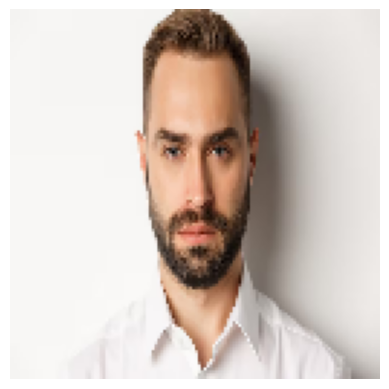

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: Without Mask 😷
Uploaded: imag.jpg


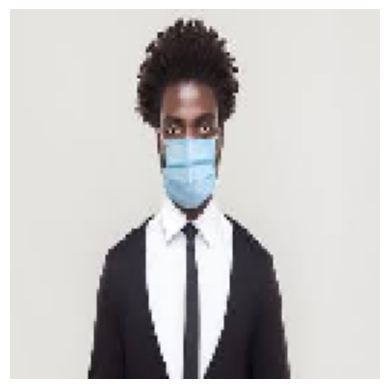

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: With Mask 🙂
Uploaded: images (1).jpg


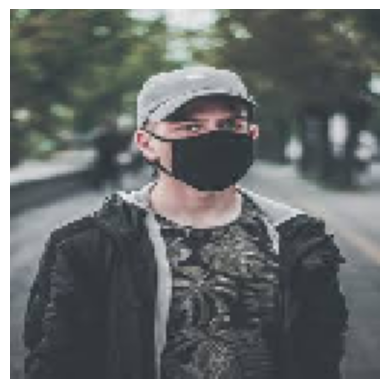

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: With Mask 🙂
Uploaded: indian-man-wearing-mask-stock-260nw-2062574735.webp


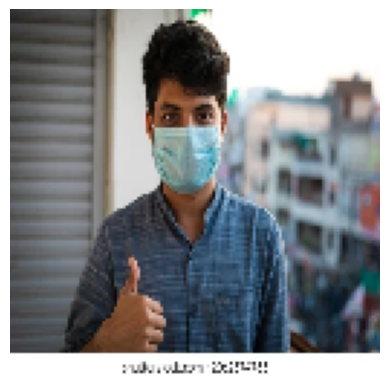

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: With Mask 🙂
Uploaded: nomask (1).jpg


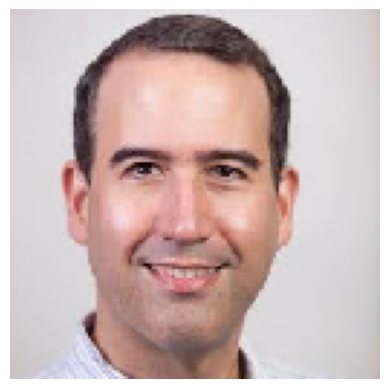

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: Without Mask 😷


In [37]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# ---- Upload ----
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    print("Uploaded:", img_path)

    # ---- Load image ----
    img = image.load_img(img_path, target_size=(128,128))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    # ---- Preprocess ----
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # ---- Predict ----
    pred = model.predict(img_array)[0][0]

    # ---- Output ----
    label = "Without Mask 😷" if pred > 0.5 else "With Mask 🙂"
    print("Prediction:", label)


/tmp/ipython-input-2859206067.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label = int(pred[0] > 0.5)  # binary classification


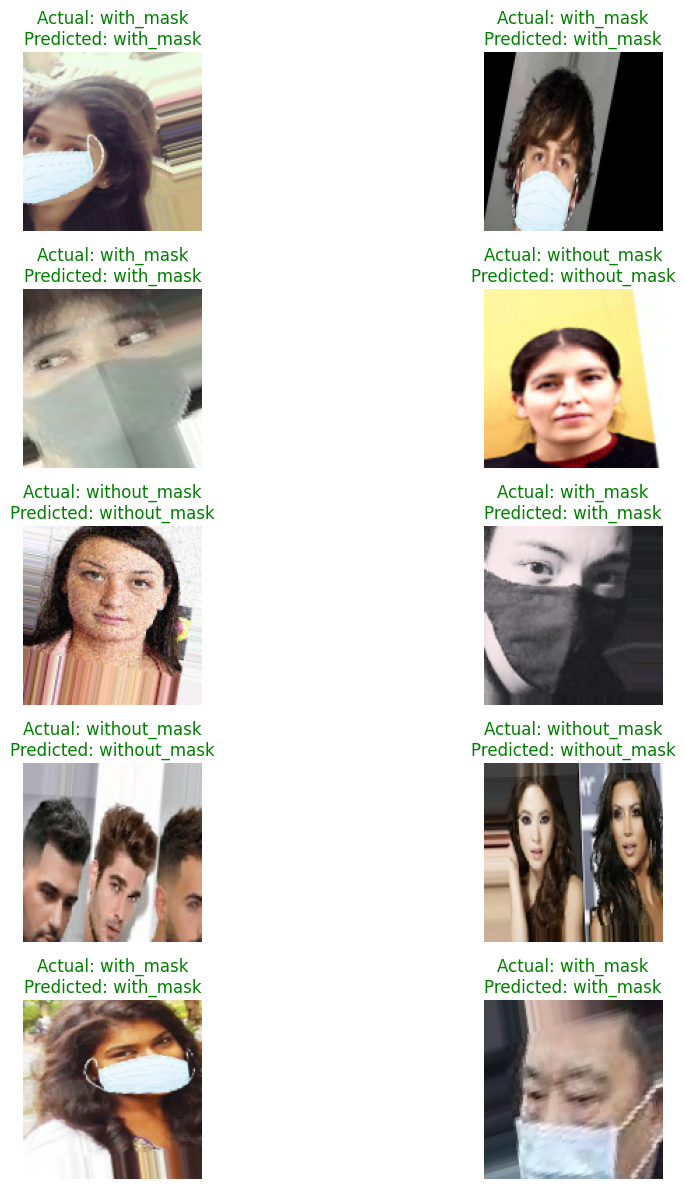

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# get clas name
class_names = list(val_data.class_indices.keys())

# Fetching one batch of imgs from validation set
images, labels = next(val_data)

# Show first 10 imgs
plt.figure(figsize=(12, 12))

for i in range(10):
    img = images[i]
    true_label = labels[i]

    # img prepro...
    pred = model.predict(img[np.newaxis, ...], verbose=0)
    pred_label = int(pred[0] > 0.5)  # binary classification

    plt.subplot(5, 2, i+1)
    plt.imshow(img)
    plt.axis("off")

    title = f"Actual: {class_names[int(true_label)]}\nPredicted: {class_names[pred_label]}"
    color = "green" if true_label == pred_label else "red"
    plt.title(title, color=color)

plt.tight_layout()
plt.show()
